Loaded 'word'. Removed 2 duplicates/empty items.
Indexing 333331 unique items into the BST...
Displaying tree...


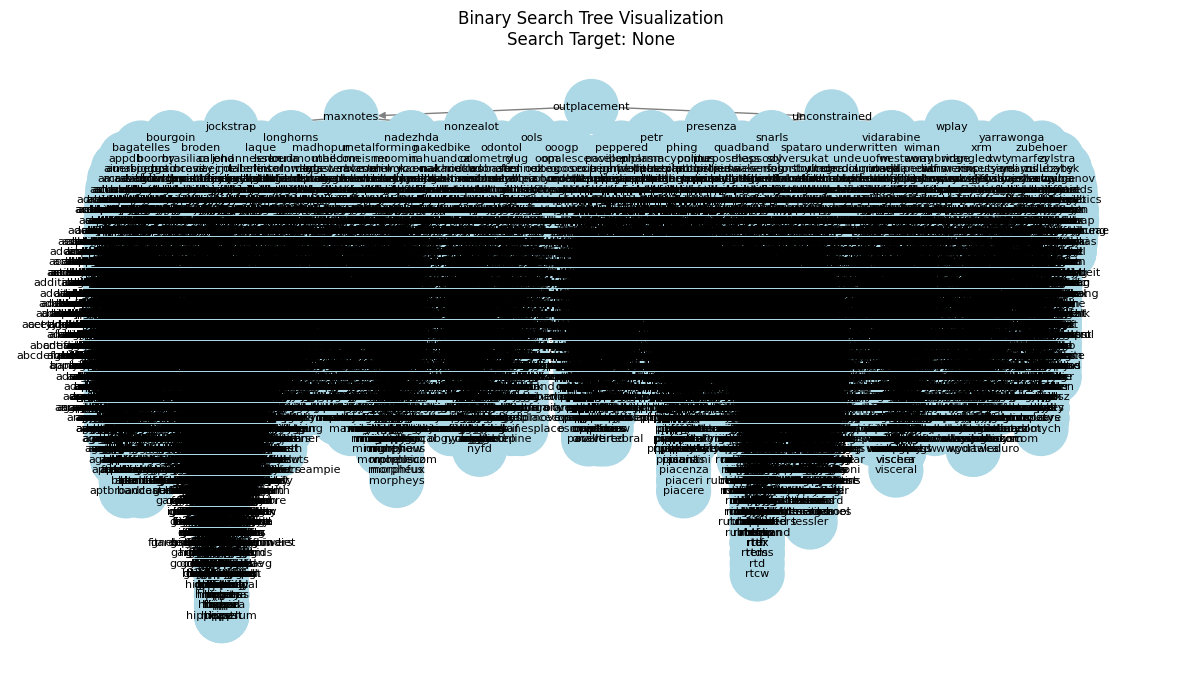

Visualizing search path for: rtcw


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

# ==========================================
#  USER CONFIGURATION (EDIT THIS SECTION)
# ==========================================
# 1. Put your CSV file name here (e.g., 'products.csv')
CSV_FILE_PATH = "data.csv" 

# 2. Which column header contains the data? 
# (If left as None, the code will automatically grab the first column)
CSV_COLUMN_NAME = "word" 

# ==========================================

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None
        self.visual_graph = nx.DiGraph()
        self.pos = {}

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current, key):
        if key < current.key:
            if current.left is None:
                current.left = Node(key)
            else:
                self._insert_recursive(current.left, key)
        elif key > current.key:
            if current.right is None:
                current.right = Node(key)
            else:
                self._insert_recursive(current.right, key)

    def search_path(self, key):
        path = []
        current = self.root
        while current:
            path.append(current.key)
            if key == current.key:
                return path, True
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return path, False

    def build_visual_graph(self, node, x=0, y=0, layer=1):
        if node is not None:
            self.visual_graph.add_node(node.key)
            self.pos[node.key] = (x, y)
            spacing = 10 / (2 ** layer) 
            
            if node.left:
                self.visual_graph.add_edge(node.key, node.left.key)
                self.build_visual_graph(node.left, x - spacing, y - 1, layer + 1)
            if node.right:
                self.visual_graph.add_edge(node.key, node.right.key)
                self.build_visual_graph(node.right, x + spacing, y - 1, layer + 1)

    def visualize(self, search_target=None):
        self.visual_graph.clear()
        self.pos.clear()
        self.build_visual_graph(self.root)

        plt.figure(figsize=(15, 8))
        ax = plt.gca()
        ax.set_title(f"Binary Search Tree Visualization\nSearch Target: {search_target if search_target else 'None'}")

        node_colors = []
        if search_target:
            path, found = self.search_path(search_target)
            for node in self.visual_graph.nodes():
                if node in path:
                    color = 'green' if node == search_target and found else 'orange'
                    node_colors.append(color)
                else:
                    node_colors.append('lightblue')
        else:
            node_colors = ['lightblue' for _ in self.visual_graph.nodes()]

        nx.draw(self.visual_graph, self.pos, with_labels=True, 
                node_size=1500, node_color=node_colors, font_size=8, 
                edge_color='gray', arrows=True)
        plt.show()

# --- IMPROVED CSV HANDLING ---
def load_and_clean_csv(file_path, target_column):
    """
    Reads CSV. If file doesn't exist, creates a dummy one.
    If column doesn't exist, defaults to the first column.
    """
    # 1. Handle missing file
    if not os.path.exists(file_path):
        print(f"File '{file_path}' not found. Creating a sample CSV for you...")
        df_sample = pd.DataFrame({"Keywords": ["Algorithm", "Data", "Binary", "Data", "Tree", "Binary", "Graph"]})
        df_sample.to_csv(file_path, index=False)
        target_column = "Keywords" # Force column name for the sample file

    # 2. Read CSV
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return []
    
    # 3. Handle Column Selection
    if target_column not in df.columns:
        first_col = df.columns[0]
        print(f"Warning: Column '{target_column}' not found. Using first column '{first_col}' instead.")
        target_column = first_col

    # 4. Clean duplicates and nulls
    initial_count = len(df)
    # Convert to string to ensure consistency, drop NA, drop duplicates
    clean_series = df[target_column].dropna().astype(str).drop_duplicates()
    final_count = len(clean_series)
    
    print(f"Loaded '{target_column}'. Removed {initial_count - final_count} duplicates/empty items.")
    return clean_series.tolist()

# --- DRIVER CODE ---
if __name__ == "__main__":
    bst = BST()
    
    # Load data using the CONFIG variables at the top
    dataset = load_and_clean_csv(CSV_FILE_PATH, CSV_COLUMN_NAME)
    
    if not dataset:
        print("No data found to visualize.")
    else:
        # Shuffle for better BST balance
        random.seed(42)
        random.shuffle(dataset)

        print(f"Indexing {len(dataset)} unique items into the BST...")
        for item in dataset:
            bst.insert(item)

        # Visualize Full Tree
        print("Displaying tree...")
        bst.visualize()
        
        # Visualize Search Path
        target = "rtcw" 
        print(f"Visualizing search path for: {target}")
        bst.visualize(search_target=target)